<a href="https://colab.research.google.com/github/saurater/machine_learning/blob/main/Tutorial_de_Redes_Neurais_Artificiais_An%C3%A1lise_de_Rotatividade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial de Redes Neurais Artificiais - Análise de Rotatividade

**Autora:** Shruti Iyyer

**Tradução e Adaptação**: Sam Faraday

**Artigo Original**: [Deep Tutorial 1 ANN and Classification](https://www.kaggle.com/code/shrutimechlearn/deep-tutorial-1-ann-and-classification/notebook)

## Introdução

* O que são RNA's?
* Tipos de Redes Neurais?
* Existe uma diferença entre RN e RNA?
* Em que situação o algoritmo se encaixa melhor?
* Como funciona a RNA?
* Função de Ativação
* O que acontece sem a função de ativação?
* Como as RNs são diferentes dos Modelos clássicos?
* Implementação
* Problemas de Negócio e Análise Explantória de Dados
* Métricas de Avaliação


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import keras
import tensorflow
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# 1. O que são RNA's?

As **R**edes **N**eurais **A**rtificiais são uma das principais ferramentas utilizadas no aprendizado de máquina. Como a parte “neural” de seu nome sugere, elas são sistemas inspirados no cérebro que se destinam a replicar a maneira como nós, humanos, aprendemos. 

As redes neurais consistem em camadas de entrada e saída, bem como (na maioria dos casos) uma camada oculta que consiste em unidades que transformam a entrada em algo que a camada de saída pode usar. 

As RNA's possuem três camadas que são interconectadas. A primeira camada consiste em neurônios de entrada. Esses neurônios enviam dados para a segunda camada, que por sua vez envia os neurônios de saída para a terceira camada. 

As RNA's são consideradas ferramentas de modelagem de dados estatísticos não lineares onde as relações complexas entre entradas e saídas são modeladas ou padrões são encontrados. Observe que um neurônio também pode ser chamado de perceptron.

Nota: A maneira como as camadas seriam criadas, organizadas, atribuídas, o número de neurônios que as camadas manteriam e outras questões desse tipo estão sob o projeto de arquitetura para redes neurais. É uma coisa comum ao começar a ter essas consultas. Francamente, a arquitetura de RN's é um oceano, pode-se obter conhecimento dela apenas explorando-a, trabalhando em diferentes problemas otimizando para melhores soluções por tentativa e erro. Existem algumas regras básicas que são conhecidas, mas como a complexidade do mecanismo é tão grande, existem poucas provas detalhadas de por que algumas coisas funcionam para alguns problemas e outras não.

![](https://icdn6.digitaltrends.com/image/artificial_neural_network_1-720x720.jpg)

Para uma ideia básica de como uma rede neural de aprendizado profundo aprende, imagine uma linha de fábrica. Depois que as matérias-primas (o conjunto de dados) são inseridas, elas passam pela esteira transportadora, com cada parada ou camada subsequente extraindo um conjunto diferente de recursos de alto nível. Se a rede se destina a reconhecer um objeto, a primeira camada pode analisar o brilho de seus pixels. A próxima camada poderia identificar quaisquer arestas na imagem, com base em linhas de pixels semelhantes. Depois disso, outra camada pode reconhecer texturas e formas, e assim por diante. Quando a quarta ou quinta camada for alcançada, a rede de aprendizado profundo terá criado detectores de recursos complexos. Ele pode descobrir que certos elementos da imagem (como um par de olhos, um nariz e uma boca) são comumente encontrados juntos.

Feito isso, os pesquisadores que treinaram a rede podem atribuir rótulos à saída e, em seguida, usar a retropropagação para corrigir quaisquer erros cometidos. Depois de um tempo, a rede pode realizar suas próprias tarefas de classificação sem precisar de ajuda humana o tempo todo.

# 2. Tipos de Rede Neural

Existem vários tipos de rede neural, cada uma com seus próprios casos de uso e níveis de complexidade específicos. O tipo mais básico de rede neural é algo chamado de rede neural feedforward, na qual a informação viaja em apenas uma direção da entrada para a saída. 

Um tipo de rede mais amplamente utilizado é a rede neural recorrente, na qual os dados podem fluir em várias direções. Essas redes neurais possuem maiores habilidades de aprendizado e são amplamente empregadas para tarefas mais complexas, como aprender caligrafia ou reconhecimento de linguagem.

Existem também redes neurais convolucionais, redes de máquinas Boltzmann, redes Hopfield e uma variedade de outras. Escolher a rede certa para sua tarefa depende dos dados com os quais você precisa treiná-la e do aplicativo específico que você tem em mente. Em alguns casos, pode ser desejável usar várias abordagens, como seria o caso de uma tarefa desafiadora como o reconhecimento de voz.

![](https://i.stack.imgur.com/LgmYv.png)
Fonte: https://i.stack.imgur.com/LgmYv.png

# 3. Existe diferença entre RN e RNA?

rn - Rede Neural é um termo amplo que abrange vários tipos de redes que foram mostrados acima. 

RNA é um dos tipos? Bem, para entender isso, é importante perceber que a rede neural por si só não é um algoritmo, mas uma estrutura que auxilia os algoritmos a funcionar. RNA é o tipo mais básico de implementação de neurais. 

RNA foi o termo cunhado muito antes e hoje em dia os dois termos são usados ​​de forma intercambiável.


# 4. Em que situação o algoritmo se encaixa melhor?

A RNA raramente é usada para modelagem preditiva. A razão é que as Redes Neurais Artificiais (RNA) geralmente tentam sobreajustar o relacionamento. A RNA é geralmente usada nos casos em que o que aconteceu no passado se repete quase exatamente da mesma maneira. Por exemplo, digamos que estamos jogando Black Jack contra um computador. Um oponente inteligente baseado em RNA seria um oponente muito bom neste caso (supondo que eles consigam manter o tempo de computação baixo). 

Com o tempo a RNA irá se treinar para todos os casos possíveis de fluxo de cartão. E dado que não estamos embaralhando cartas com um dealer, a RNA será capaz de memorizar cada chamada. Portanto, é um tipo de técnica de aprendizado de máquina que possui uma memória enorme. Mas não funciona bem no caso em que a população de pontuação é significativamente diferente em comparação com a amostra de treinamento. Por exemplo, se eu planejo segmentar o cliente para uma campanha usando a resposta anterior de uma RNA. Provavelmente estarei usando uma técnica errada, pois pode ter ajustado demais a relação entre a resposta e outros preditores.

# 5. Como funciona a RNA?

É verdade que o funcionamento da RNA tem suas raízes na rede neural que reside no cérebro humano. RNA opera em algo conhecido como estado oculto. Esses estados ocultos são semelhantes aos neurônios. Cada um desses estados ocultos é uma forma transitória que tem um comportamento probabilístico. Uma grade de tal estado oculto atua como uma ponte entre a entrada e a saída.


Temos uma camada de entrada que são os dados que fornecemos para a RNA. Temos as camadas ocultas, que é onde a mágica acontece. Por fim, temos a camada de saída, que é onde os cálculos finalizados da rede são colocados para uso.





![](http://cdn-images-1.medium.com/max/600/1*f0hA2R652htmc1EaDrgG8g.png)

Inicialmente os pesos da rede podem ser aleatórios. Quando a entrada é fornecida à camada de entrada, o processo avança e a camada oculta recebe a entrada combinada com os pesos. Este processo continua até que a camada final de saída seja alcançada e o resultado seja dado. 

Quando o resultado sai, ele é comparado com o valor real e um algoritmo de retropropagação entra em ação para ajustar os pesos das ligações da rede para melhorar o resultado. 

O que os neurônios nas camadas fazem então? Eles são responsáveis ​​pelo aprendizado individualmente. Eles consistem em função de ativação que permite que o sinal passe ou não dependendo de qual função de ativação está sendo usada e qual entrada veio da camada anterior. Veremos as funções de ativação em detalhes agora.

![](http://www.analyticsvidhya.com/blog/wp-content/uploads/2014/10/flowchart-ANN.png)

Fonte: http://www.analyticsvidhya.com/blog/wp-content/uploads/2014/10/flowchart-ANN.png

# 6. Função de Ativação

As funções de ativação são muito importantes para uma Rede Neural Artificial aprender e dar sentido a algo realmente complicado e Mapeamentos funcionais complexos não lineares entre as entradas e a variável de resposta. Elas introduzem propriedades não lineares à nossa Rede. Sinal de entrada de um nó em um RNA para um sinal de saída. Esse sinal de saída agora é usado como entrada na próxima camada da pilha.

Especificamente em RNA fazemos a soma dos produtos das **Entradas (X)** e seus correspondentes **Pesos (W)** e aplicamos uma função de ativação **f(x)** a ela para obter a saída daquela camada e alimentá-la como entrada para a próxima camada.



## Tipos mais populares de funções de ativação:
* Sigmóide ou Logística
* Tanh — Tangente hiperbólica
* ReLu - Unidades lineares retificadas

**Função de ativação sigmóide**: É uma função de ativação da forma f(x) = 1 / 1 + exp(-x) . Seu intervalo está entre 0 e 1. É uma curva em forma de S — . É fácil de entender e aplicar, mas tem grandes razões que o fizeram cair em popularidade -

* Problema de gradiente desaparecendo
* Em segundo lugar, sua saída não é centrada em zero. Isso faz com que as atualizações de gradiente vão longe demais em direções diferentes. 0 < output < 1, e torna a otimização mais difícil.
* Os sigmóides saturam e matam os gradientes.
* Os sigmóides têm convergência lenta.


![](http://cdn-images-1.medium.com/max/1600/0*WYB0K0zk1MiIB6xp.png)



**Função Tangente Hiperbólica - Tanh** : Sua fórmula matemática é f(x) = 1 — exp(-2x) / 1 + exp(-2x). Agora, sua saída é centrada em zero porque seu intervalo entre -1 e 1, ou seja, -1 < output < 1 . Portanto, a otimização é mais fácil neste método, portanto, na prática, é sempre preferível à função sigmóide. Mas ainda sofre de problema de gradiente de fuga.


![](http://cdn-images-1.medium.com/max/1600/0*VHhGS4NwibecRjIa.png)

**ReLu- Unidades Lineares Retificadas**: Tornou-se muito popular nos últimos dois anos. Foi recentemente provado que teve 6 vezes a melhoria na convergência da função Tanh. É apenas R(x) = max(0,x) ou seja, se x < 0 , R(x) = 0 e se x >= 0 , R(x) = x. Assim vendo a forma matemática desta função podemos ver que ela é muito simples e eficiente. Muitas vezes, em aprendizado de máquina e ciência da computação, notamos que as técnicas e métodos mais simples e consistentes são apenas os preferidos e os melhores. Portanto, evita e corrige o problema do gradiente de fuga. Quase todos os modelos de aprendizado profundo usam ReLu hoje em dia.

Mas sua limitação é que ele deve ser usado apenas em camadas ocultas de um modelo de rede neural.

Portanto, para camadas de saída, devemos usar uma **função Softmax para um problema de classificação** para calcular as probabilidades para as classes, e **para um problema de regressão deve simplesmente usar uma função linear**.

Outro problema com o ReLu é que alguns gradientes podem ser frágeis durante o treinamento e podem morrer. Pode causar uma atualização de peso que fará com que nunca mais seja ativado em nenhum ponto de dados. Simplesmente dizendo que ReLu poderia resultar em Neurônios Mortos.

Para corrigir esse problema, outra modificação foi introduzida chamada Leaky ReLu para corrigir o problema de neurônios morrendo. Ele introduz uma pequena inclinação para manter as atualizações vivas.

Temos então outra variante feita de ReLu e Leaky ReLu chamada função Maxout.

![](http://cdn-images-1.medium.com/max/1600/0*qtfLu9rmtNullrVC.png)

# 7. O que acontece sem a função de ativação?

Se não aplicarmos uma função de ativação, o sinal de saída seria simplesmente uma função linear simples. Uma função linear é apenas um polinômio de um grau. Agora, uma equação linear é fácil de resolver, mas é limitada em sua complexidade e tem menos poder para aprender mapeamentos funcionais complexos a partir de dados. Uma rede neural sem função de ativação seria simplesmente um modelo de regressão linear, que tem poder limitado e não funciona bem na maioria das vezes. 

Queremos que nossa Rede Neural não apenas aprenda e calcule uma função linear, mas algo mais complicado do que isso. Além disso, sem a função de ativação, nossa rede neural não seria capaz de aprender e modelar outros tipos complicados de dados, como imagens, vídeos, áudio, fala etc. É por isso que usamos técnicas de rede neural artificial, como Deep learning, para entender algo complicado ,grandes conjuntos de dados não lineares e de alta dimensão, onde o modelo tem muitas e muitas camadas ocultas entre e tem uma arquitetura muito complicada que nos ajuda a entender e extrair conhecimento de grandes conjuntos de dados tão complicados.

# 8. Como as RN's São Diferentes dos Modelos Clássicos?

Para entender melhor a computação neural artificial é importante saber primeiro como um computador 'serial' convencional e seu software processam informações. Um computador serial possui um processador central que pode endereçar uma série de locais de memória onde os dados e instruções são armazenados. Os cálculos são feitos pelo processador lendo uma instrução, bem como quaisquer dados que a instrução requer de endereços de memória, a instrução é então executada e os resultados são salvos em um local de memória especificado conforme necessário. Em um sistema serial (e um paralelo padrão também) as etapas computacionais são determinísticas, sequenciais e lógicas, e o estado de uma determinada variável pode ser rastreado de uma operação para outra.

Em comparação, as RNAs não são sequenciais ou necessariamente determinísticas. Não há processadores centrais complexos, mas sim muitos processadores simples que geralmente não fazem nada além de receber a soma ponderada de suas entradas de outros processadores. RNAs não executam instruções programadas; eles respondem em paralelo (simulado ou real) ao padrão de entradas apresentado a ele. Também não há endereços de memória separados para armazenar dados. Em vez disso, as informações estão contidas no 'estado' geral de ativação da rede. O 'conhecimento' é assim representado pela própria rede, que é literalmente mais do que a soma de seus componentes individuais.

# 9. Implementação

## Um Resumo Sobre as Bibliotecas RN:


**Theano** é uma biblioteca de computação numérica de código aberto baseada na sintaxe numpy. Ele pode ser executado não apenas na CPU (Unidade Central de Processamento), mas também na GPU (Unidade de Processamento Gráfico). GPU é um processador para fins gráficos um pouco semelhante a uma placa gráfica. A GPU é muito mais poderosa em termos de eficiência etc. porque tem mais núcleos e é capaz de executar mais cálculos de pontos flutuantes por segundo do que a CPU. A GPU é altamente especializada para cálculos pesados ​​e paralelos, que é um requisito nas Redes Neurais que estamos prestes a ver.

Como a computação paralela entra em jogo em RN's? Quando estamos propagando as diferentes ativações de neurônios para a função de ativação ou quando propagamos o erro de volta. Também os cálculos podem ser realizados mais rapidamente desta forma. Theano foi desenvolvido na Universidade de Montreal.

O **Tensorflow** é semelhante ao Theano. Foi desenvolvido pelo Google.

No entanto, o ponto a considerar é que essas duas bibliotecas estão mais voltadas para o lado de pesquisa e desenvolvimento de Redes Neurais. Se fôssemos criar um modelo do zero e fazer algumas melhorias nele, experimentar ou algo assim, esses dois seriam ótimos, mas agora estaríamos usando o **Keras** para começar até avançarmos. Keras de alguma forma envolve as duas bibliotecas para nós e fornece módulos de código pequenos e fáceis de implementar.

# 10. Problema de Negócios e Análise de Dados Explanatória

Nosso problema de negócios que escolhi para este tutorial é um problema de classificação em que temos um conjunto de dados no qual há detalhes dos clientes de um banco e a variável de destino é uma variável binária que reflete o fato de o cliente ter saído do banco (fechou sua conta) ou ele continua a ser um cliente.

In [2]:
# Importando os Dados com Pandas
dados_de_rotatividade = pd.read_csv('Churn_Modelling.csv')
# https://github.com/saurater/machine_learning/blob/main/Churn_Modelling.csv

In [3]:
# visualizando os 2 primeiros registros

# sample(x) traz uma amostra aleatória dos registros

# head(x) traz os primeiros x registros

# tail(x) traz os últimos x registros
dados_de_rotatividade.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [4]:
#traduzindo os nomes das features (colunas)
dados_de_rotatividade = dados_de_rotatividade.rename(\
columns={'RowNumber': 'No_Linha',"CustomerId" : "Id_Cliente", "Surname" : "Sobrenome",\
'CreditScore' : 'Pontuacao_de_Credito', 'Geography' : 'Pais',\
"Gender" : "Sexo", "Age" : "Idade", "Tenure": "Tempo_de_Conta", "Balance": "Saldo_em_Conta",\
"NumOfProducts" : "Qtd_Produtos", "HasCrCard" : "Tem_Cartao_Credito", "IsActiveMember": "Ativo",\
"EstimatedSalary" :"Salario_Estimado", "Exited" : "Saiu"})

dados_de_rotatividade.tail(2)

,No_Linha,Id_Cliente,Sobrenome,Pontuacao_de_Credito,Pais,Sexo,Idade,Tempo_de_Conta,Saldo_em_Conta,Qtd_Produtos,Tem_Cartao_Credito,Ativo,Salario_Estimado,Saiu
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
#definindo o index do dataframe
try:
  dados_de_rotatividade.set_index("No_Linha", inplace = True)
except:
  pass  

dados_de_rotatividade.sample(2)

,Id_Cliente,Sobrenome,Pontuacao_de_Credito,Pais,Sexo,Idade,Tempo_de_Conta,Saldo_em_Conta,Qtd_Produtos,Tem_Cartao_Credito,Ativo,Salario_Estimado,Saiu
No_Linha,,,,,,,,,,,,,
5856,15608541,Claiborne,498,France,Male,46,1,91857.66,1,1,0,101954.78,1
4645,15714240,Ponomarev,712,Spain,Male,74,5,0.00,2,0,0,151425.82,0


In [6]:
# Analisando quantidades de registros, registros nulos e tipos
dados_de_rotatividade.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id_Cliente            10000 non-null  int64  
 1   Sobrenome             10000 non-null  object 
 2   Pontuacao_de_Credito  10000 non-null  int64  
 3   Pais                  10000 non-null  object 
 4   Sexo                  10000 non-null  object 
 5   Idade                 10000 non-null  int64  
 6   Tempo_de_Conta        10000 non-null  int64  
 7   Saldo_em_Conta        10000 non-null  float64
 8   Qtd_Produtos          10000 non-null  int64  
 9   Tem_Cartao_Credito    10000 non-null  int64  
 10  Ativo                 10000 non-null  int64  
 11  Salario_Estimado      10000 non-null  float64
 12  Saiu                  10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [7]:
# Análise Estatística: Qtd, Média, Desvio Padrão (STD), Min, Max e Quartis (25%, 50% e 75%)
dados_de_rotatividade.describe().round()

,Id_Cliente,Pontuacao_de_Credito,Idade,Tempo_de_Conta,Saldo_em_Conta,Qtd_Produtos,Tem_Cartao_Credito,Ativo,Salario_Estimado,Saiu
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,15690941.0,651.0,39.0,5.0,76486.0,2.0,1.0,1.0,100090.0,0.0
std,71936.0,97.0,10.0,3.0,62397.0,1.0,0.0,0.0,57510.0,0.0
min,15565701.0,350.0,18.0,0.0,0.0,1.0,0.0,0.0,12.0,0.0
25%,15628528.0,584.0,32.0,3.0,0.0,1.0,0.0,0.0,51002.0,0.0
50%,15690738.0,652.0,37.0,5.0,97199.0,1.0,1.0,1.0,100194.0,0.0
75%,15753234.0,718.0,44.0,7.0,127644.0,2.0,1.0,1.0,149388.0,0.0
max,15815690.0,850.0,92.0,10.0,250898.0,4.0,1.0,1.0,199992.0,1.0


In [8]:
dados_de_rotatividade.head(3)

,Id_Cliente,Sobrenome,Pontuacao_de_Credito,Pais,Sexo,Idade,Tempo_de_Conta,Saldo_em_Conta,Qtd_Produtos,Tem_Cartao_Credito,Ativo,Salario_Estimado,Saiu
No_Linha,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [9]:
# vendo apenas as colunas do tipo object (categóricas)
dados_de_rotatividade.select_dtypes(['object']).sample(3)

,Sobrenome,Pais,Sexo
No_Linha,,,
8359,Sal,Spain,Female
3322,Akhtar,France,Male
5817,Adams,France,Male


In [10]:
#analisando as categorias em Pais
dados_de_rotatividade["Pais"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [11]:
#traduzindo os nomes dos países com replace
dados_de_rotatividade = dados_de_rotatividade.replace( {'France' : "Franca", 'Spain' : "Espanha", 'Germany' : "Alemanha" } )

In [12]:
# Analisando novamente as categorias em Pais
dados_de_rotatividade["Pais"].unique()

array(['Franca', 'Espanha', 'Alemanha'], dtype=object)

In [13]:
# Analisando  as categorias em Sexo
dados_de_rotatividade["Sexo"].unique()

array(['Female', 'Male'], dtype=object)

In [14]:
#traduzindo os sexos com replace
dados_de_rotatividade = dados_de_rotatividade.replace( {'Female' : "Feminino", 'Male' : "Masculino" } )

In [15]:
# Analisando  as categorias em Sexo
dados_de_rotatividade["Sexo"].unique()

array(['Feminino', 'Masculino'], dtype=object)

In [16]:
dados_de_rotatividade.sample(3)

,Id_Cliente,Sobrenome,Pontuacao_de_Credito,Pais,Sexo,Idade,Tempo_de_Conta,Saldo_em_Conta,Qtd_Produtos,Tem_Cartao_Credito,Ativo,Salario_Estimado,Saiu
No_Linha,,,,,,,,,,,,,
3297,15755018,Dickinson,568,Alemanha,Feminino,26,10,109819.16,2,1,0,154491.39,0
7725,15673591,Oluchukwu,842,Franca,Masculino,44,3,141252.18,4,0,1,128521.16,1
8125,15733872,Marino,791,Alemanha,Feminino,33,10,130229.71,2,0,0,54019.93,1


In [17]:
# Algumas colunas são totalmente improdutivas, então vamos removê-las
# vamos usar um try, pois pode ser que vc tente executar mais de uma vez, assim, não teremos erros
try:
  dados_de_rotatividade.drop(['Id_Cliente','Sobrenome'],axis=1,inplace=True)
except:
  pass

In [18]:
dados_de_rotatividade.head(3)

,Pontuacao_de_Credito,Pais,Sexo,Idade,Tempo_de_Conta,Saldo_em_Conta,Qtd_Produtos,Tem_Cartao_Credito,Ativo,Salario_Estimado,Saiu
No_Linha,,,,,,,,,,,
1,619,Franca,Feminino,42,2,0.00,1,1,1,101348.88,1
2,608,Espanha,Feminino,41,1,83807.86,1,0,1,112542.58,0
3,502,Franca,Feminino,42,8,159660.80,3,1,0,113931.57,1


In [19]:
# Algumas colunas têm dados de texto, então vamos codificá-las com get_dummies
pais_dummies = pd.get_dummies(prefix='Pais',data=dados_de_rotatividade,columns=['Pais'])

In [20]:
pais_dummies.sample(3)

,Pontuacao_de_Credito,Sexo,Idade,Tempo_de_Conta,Saldo_em_Conta,Qtd_Produtos,Tem_Cartao_Credito,Ativo,Salario_Estimado,Saiu,Pais_Alemanha,Pais_Espanha,Pais_Franca
No_Linha,,,,,,,,,,,,,
6584,727,Masculino,21,8,153344.72,1,1,1,163295.87,0,1,0,0
8950,731,Masculino,46,10,0.00,2,1,0,153015.42,0,0,1,0
7495,795,Feminino,36,1,151844.64,1,1,1,135388.89,0,0,0,1


In [21]:
sexo_dummies = pais_dummies.replace(to_replace={'Sexo': {'Feminino': 1,'Masculino':0}})

In [22]:
sexo_dummies.sample(3)

,Pontuacao_de_Credito,Sexo,Idade,Tempo_de_Conta,Saldo_em_Conta,Qtd_Produtos,Tem_Cartao_Credito,Ativo,Salario_Estimado,Saiu,Pais_Alemanha,Pais_Espanha,Pais_Franca
No_Linha,,,,,,,,,,,,,
2151,668,0,38,10,86977.96,1,0,1,37094.75,0,0,0,1
9991,714,0,33,3,35016.60,1,1,0,53667.08,0,1,0,0
2970,681,0,34,7,0.00,2,0,0,130686.59,0,0,0,1


In [23]:
# trazendo as transformações dummies de Pais e Sexo para o df dados_de_rotatividade
dados_de_rotatividade_codificados = sexo_dummies

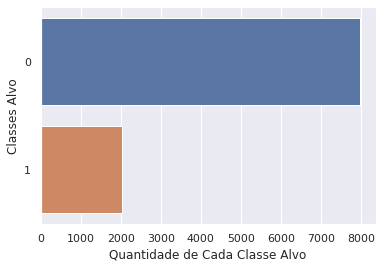

In [24]:
# Análise Gráficas das Classses Alvo
sns.countplot(y=dados_de_rotatividade_codificados.Saiu ,data=dados_de_rotatividade_codificados)
plt.xlabel("Quantidade de Cada Classe Alvo")
plt.ylabel("Classes Alvo")
plt.show()

In [25]:
# Análise Gráfica comHistograma de cada Feature

dados_de_rotatividade_codificados_sem_categoricos = dados_de_rotatividade_codificados[["Pontuacao_de_Credito", "Idade", "Tempo_de_Conta",\
"Saldo_em_Conta", "Salario_Estimado"]]
dados_de_rotatividade_codificados_sem_categoricos

,Pontuacao_de_Credito,Idade,Tempo_de_Conta,Saldo_em_Conta,Salario_Estimado
No_Linha,,,,,
1,619,42,2,0.00,101348.88
2,608,41,1,83807.86,112542.58
3,502,42,8,159660.80,113931.57
4,699,39,1,0.00,93826.63
5,850,43,2,125510.82,79084.10
...,...,...,...,...,...
9996,771,39,5,0.00,96270.64
9997,516,35,10,57369.61,101699.77
9998,709,36,7,0.00,42085.58


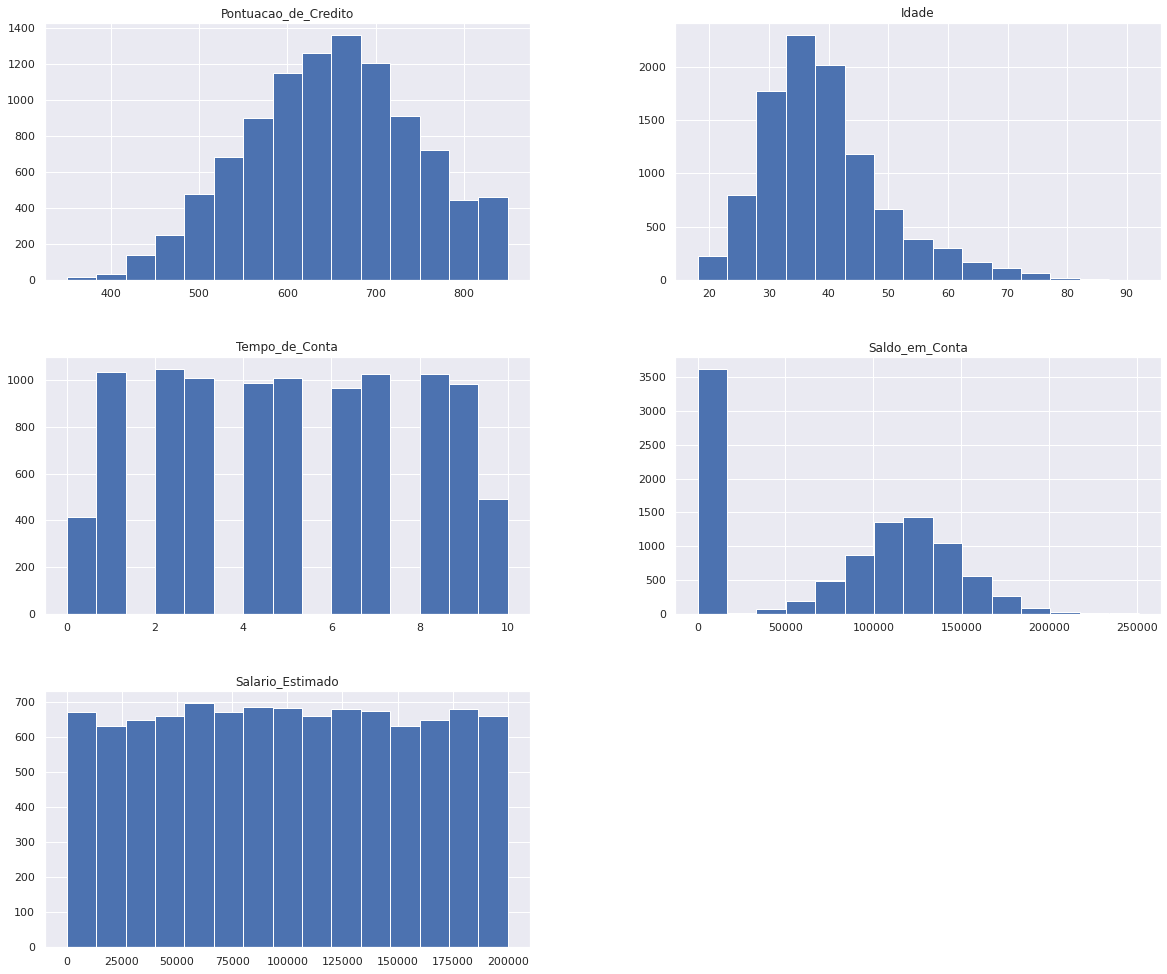

In [26]:
dados_de_rotatividade_codificados_sem_categoricos.hist(figsize=(20,17),bins = 15)
plt.title("Histogramas")
plt.show()

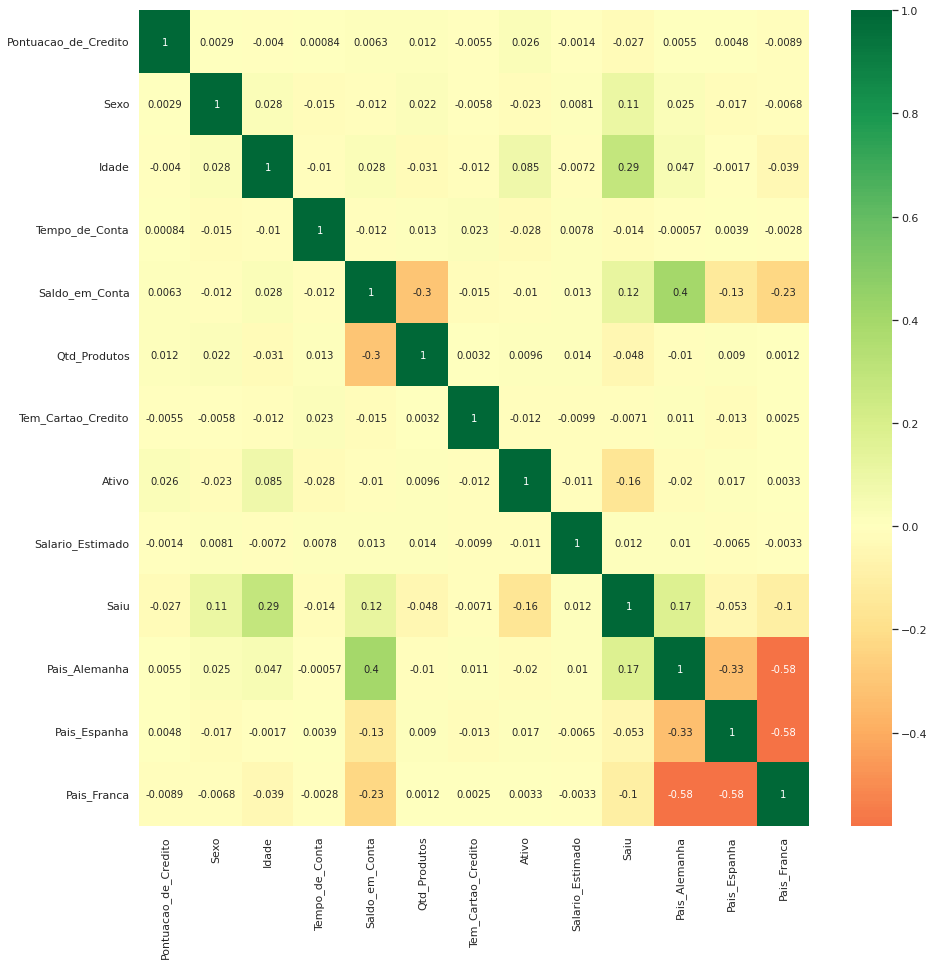

In [27]:
# Mapa de Calor de Correlações entre as Features
plt.figure(figsize=(15,15))
p=sns.heatmap(dados_de_rotatividade_codificados.corr(), annot=True,cmap='RdYlGn',center=0) 

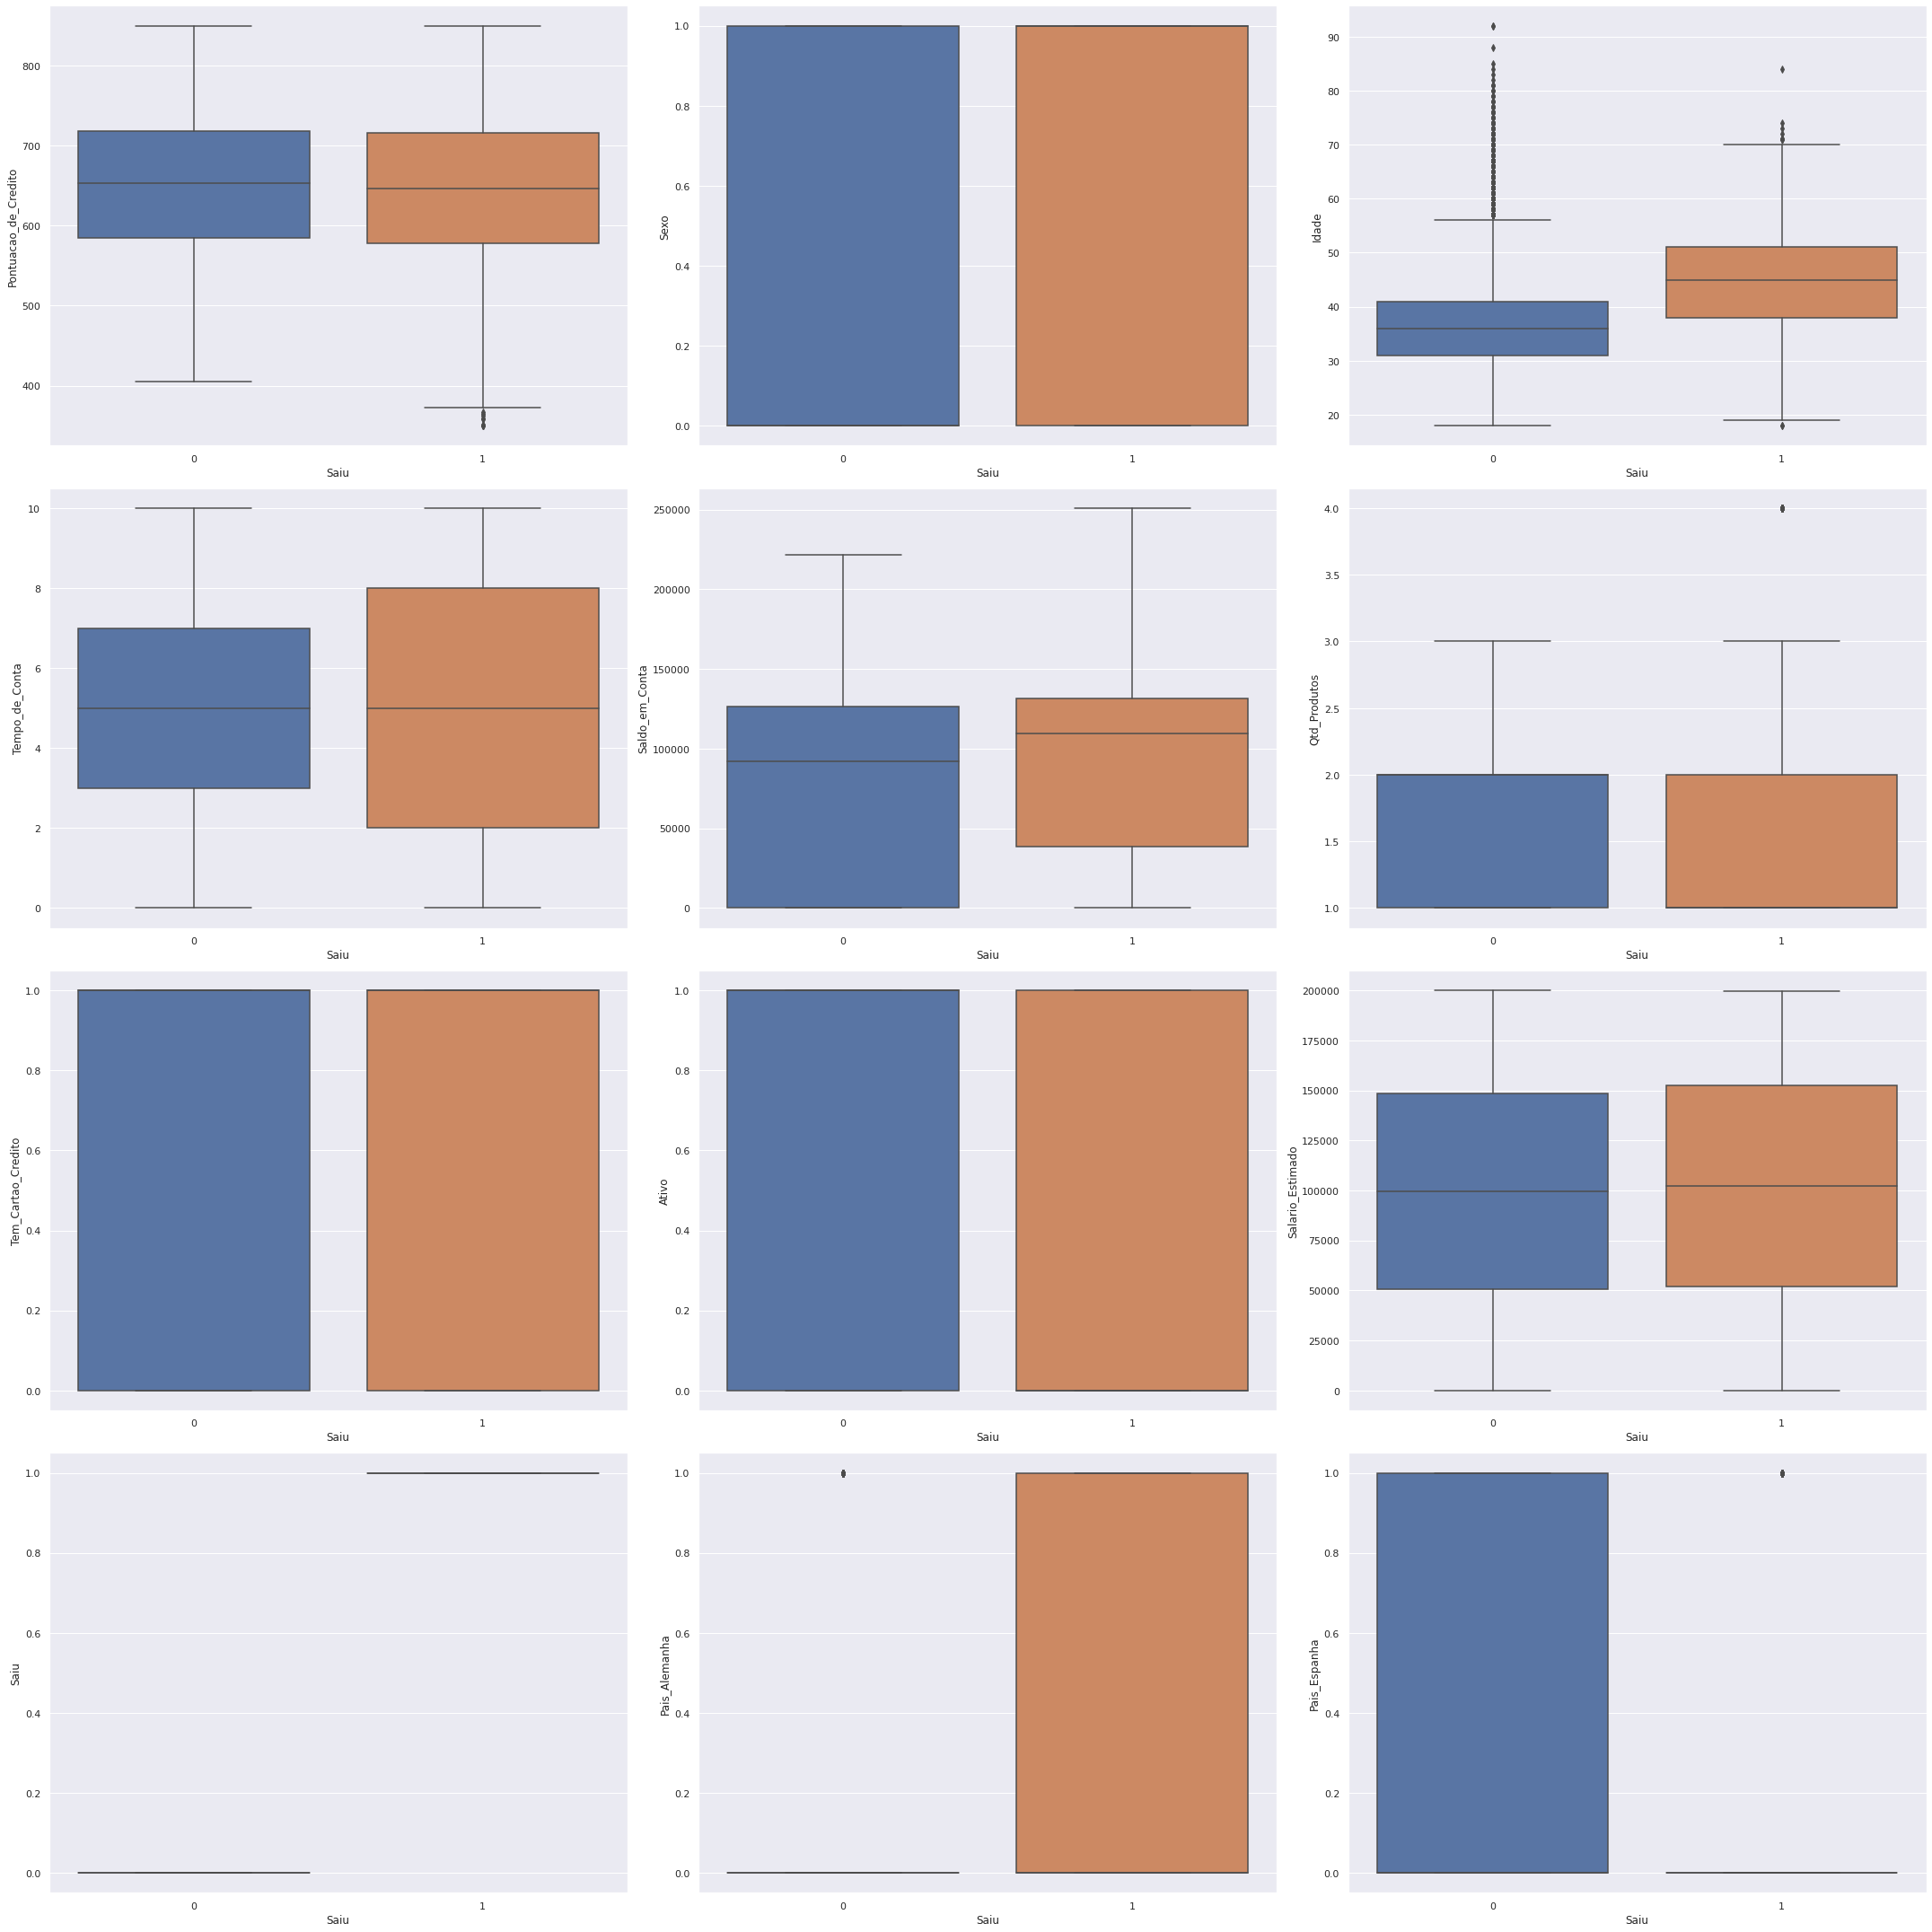

In [28]:
fig,ax = plt.subplots(nrows = 4, ncols=3, figsize=(30,30))
row = 0
col = 0
for i in range(len(dados_de_rotatividade_codificados.columns) -1):
    if col > 2:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = dados_de_rotatividade_codificados['Saiu'], y = dados_de_rotatividade_codificados[dados_de_rotatividade_codificados.columns[i]],ax = axes)
    col += 1
plt.tight_layout()
# plt.title("Features Individuais por Classe")
plt.show()

In [29]:
# Separando as Variáveis Independentes da Dependente (Alvo)
X = dados_de_rotatividade_codificados.drop(['Saiu'],axis=1)
y = dados_de_rotatividade_codificados.Saiu

In [30]:
X.sample(3)

,Pontuacao_de_Credito,Sexo,Idade,Tempo_de_Conta,Saldo_em_Conta,Qtd_Produtos,Tem_Cartao_Credito,Ativo,Salario_Estimado,Pais_Alemanha,Pais_Espanha,Pais_Franca
No_Linha,,,,,,,,,,,,
7545,566,0,34,3,0.00,1,0,0,188135.69,0,0,1
9050,629,1,33,6,0.00,2,1,1,59129.72,0,0,1
3759,514,0,38,4,112230.38,1,1,0,16717.11,0,0,1


In [31]:
# Dividindo o conjunto de dados em Conjunto de Treinamento e Conjunto de Teste
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [32]:
type(X)

pandas.core.frame.DataFrame

In [33]:
type(X_treino)

pandas.core.frame.DataFrame

# Agora Vamos Brincar de Machine Learning

# Treinando o Modelo

In [34]:
# Dimensionamento de recursos. Não queremos que uma variável independente domine a outra. Também vai facilitar os cálculos
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_treino = sc.fit_transform(X_treino)
X_teste  = sc.transform(X_teste)

In [35]:
# Modelo Sequential para inicializar nosso módulo RNA e a Dense para construir as Camadas (Layers)
from keras.models import Sequential
from keras.layers import Dense

In [36]:
classificador = Sequential()
# Adicionando a camada de entrada e a primeira camada oculta
classificador.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))

# Adicionando a segunda camada oculta
classificador.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adicionando a camada de saída
classificador.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compilando a RNA | significa aplicar SGD em toda a RNA
classificador.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Ajustando a RNA ao conjunto de treinamento
classificador.fit(X_treino, y_treino, batch_size = 10, epochs = 100,verbose = 0)

escore, acuracia = classificador.evaluate(X_treino, y_treino,
                            batch_size=10)
print('Escore de Treino:', escore)
print('Acurácia de Treino:', acuracia)

670/670 [==============================] - 1s 2ms/step - loss: 0.3942 - accuracy: 0.8367
Escore de Treino: 0.39424049854278564
Acurácia de Treino: 0.8367164134979248


# Fazendo Predições

---



In [37]:
# Prevendo os resultados do conjunto de testes
y_pred = classificador.predict(X_teste)
y_pred = (y_pred > 0.5)

print('*'*20)
escore, acuracia = classificador.evaluate(X_teste, y_teste,
                            batch_size=10)
print('Teste de escore:', escore)
print('Teste de acuracia:', acuracia)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
matriz_de_confusao = confusion_matrix(y_teste, y_pred)

********************
330/330 [==============================] - 1s 2ms/step - loss: 0.3989 - accuracy: 0.8412
Teste de escore: 0.3989139795303345
Teste de acuracia: 0.8412120938301086


# 11. Avaliando as Métricas

Text(0.5, 12.5, 'Rótulo Previsto')

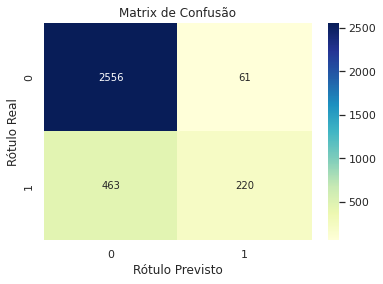

In [38]:
p = sns.heatmap(pd.DataFrame(matriz_de_confusao), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Matrix de Confusão', y=1.1)
plt.ylabel('Rótulo Real')
plt.xlabel('Rótulo Previsto')

In [39]:
#importar classification_report
from sklearn.metrics import classification_report
print(classification_report(y_teste,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2617
           1       0.78      0.32      0.46       683

    accuracy                           0.84      3300
   macro avg       0.81      0.65      0.68      3300
weighted avg       0.83      0.84      0.81      3300




# 12. Avaliação de várias instâncias de treinamento

In [40]:
# Parte 4 - Avaliando, Melhorando e Ajustando a RNA

# Avaliação da RNA
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense

def construir_classificador():
    classificador = Sequential()
    classificador.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
    classificador.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classificador.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classificador.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classificador

classificador = KerasClassifier(build_fn = construir_classificador, batch_size = 10, epochs = 100,verbose=0)
acuracias = cross_val_score(estimator = classificador, X = X_treino, y = y_treino, cv = 10)
media     = acuracias.mean()
variancia = acuracias.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


In [41]:
print('Pontuação média de precisão de 10 modelos diferentes usando a validação cruzada Kfold: {}'.format(round(media * 100)))
print('Desvio padrão da pontuação de precisão de 10 modelos diferentes usando validação cruzada Kfold: {}'.format(round(variancia * 100)))

Pontuação média de precisão de 10 modelos diferentes usando a validação cruzada Kfold: 84
Desvio padrão da pontuação de precisão de 10 modelos diferentes usando validação cruzada Kfold: 2
